In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)

2.8.0
2.8.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
from keras.datasets import mnist

# Zad 
Pibierz zbiór danych

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(28, 28, 1)


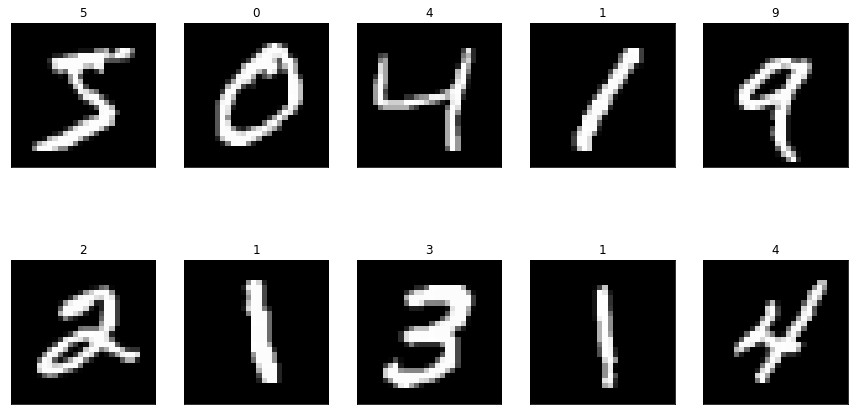

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show() 

In [ ]:
np.max(X_train[0])

255

### Normalize

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [ ]:
np.max(X_train[0])

# Zad
Przekopiuj architekturę:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_1 = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 42s 99ms/step - loss: 0.3748 - accuracy: 0.8861 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 41s 98ms/step - loss: 0.1166 - accuracy: 0.9644 - val_loss: 0.0568 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0862 - accuracy: 0.9730 - val_loss: 0.0481 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 42s 98ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0413 - val_accuracy: 0.9875
Epoch 5/15
422/422 [==============================] - 42s 98ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0373 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0359 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0345 - val_accuracy:

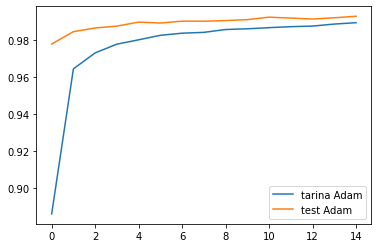

In [ ]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()